# Figures for the Sachs dataset

### i.e Figures 5 and 10

In [2]:
import numpy as np
import pandas as pd
import ut_lvcm.sachs as sachs
import ut_lvcm.utils as utils
import sempler
import os
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec
from matplotlib.lines import Line2D

Training data : [672, 865, 687, 806, 770, 759, 810, 867]
Test data : [35, 46, 36, 42, 40, 40, 43, 46]


/tmp/ipykernel_18897/2951439856.py:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [


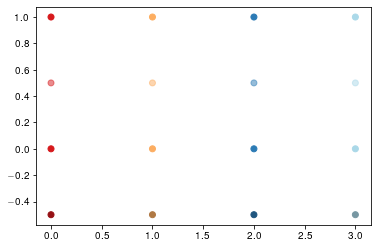

In [156]:
# Set tex formatting for plots
from matplotlib import rc
#rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
base = ['#d7191c', '#fdae61', '#2c7bb6', '#abd9e9']
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

In [157]:
def read_result(filename):
    if os.path.getsize(filename) > 0:
        with open(filename, "rb") as f:
            return pickle.load(f)

### Load files

In [4]:
splits = 50
path = "sachs_experiments/"

files_no_prune = [
"sach_results_1647122268_prune:False_random_state:1_tag:w_testset_0.pickle",
"sach_results_1647123157_prune:False_random_state:2_tag:w_testset_1.pickle",
"sach_results_1647123836_prune:False_random_state:3_tag:w_testset_2.pickle",
"sach_results_1647124554_prune:False_random_state:4_tag:w_testset_3.pickle",
"sach_results_1647125622_prune:False_random_state:5_tag:w_testset_4.pickle",
"sach_results_1647126457_prune:False_random_state:6_tag:w_testset_5.pickle",
"sach_results_1647127234_prune:False_random_state:7_tag:w_testset_6.pickle",
"sach_results_1647128133_prune:False_random_state:8_tag:w_testset_7.pickle",
"sach_results_1647128842_prune:False_random_state:9_tag:w_testset_8.pickle",
"sach_results_1647129683_prune:False_random_state:10_tag:w_testset_9.pickle",
"sach_results_1647130618_prune:False_random_state:11_tag:w_testset_10.pickle",
"sach_results_1647131292_prune:False_random_state:12_tag:w_testset_11.pickle",
"sach_results_1647132221_prune:False_random_state:13_tag:w_testset_12.pickle",
"sach_results_1647132975_prune:False_random_state:14_tag:w_testset_13.pickle",
"sach_results_1647133774_prune:False_random_state:15_tag:w_testset_14.pickle",
"sach_results_1647134410_prune:False_random_state:16_tag:w_testset_15.pickle",
"sach_results_1647135206_prune:False_random_state:17_tag:w_testset_16.pickle",
"sach_results_1647135919_prune:False_random_state:18_tag:w_testset_17.pickle",
"sach_results_1647136806_prune:False_random_state:19_tag:w_testset_18.pickle",
"sach_results_1647137753_prune:False_random_state:20_tag:w_testset_19.pickle",
"sach_results_1647138671_prune:False_random_state:21_tag:w_testset_20.pickle",
"sach_results_1647139353_prune:False_random_state:22_tag:w_testset_21.pickle",
"sach_results_1647140068_prune:False_random_state:23_tag:w_testset_22.pickle",
"sach_results_1647140842_prune:False_random_state:24_tag:w_testset_23.pickle",
"sach_results_1647141664_prune:False_random_state:25_tag:w_testset_24.pickle",
"sach_results_1647122331_prune:False_random_state:26_tag:w_testset_25.pickle",
"sach_results_1647123155_prune:False_random_state:27_tag:w_testset_26.pickle",
"sach_results_1647124025_prune:False_random_state:28_tag:w_testset_27.pickle",
"sach_results_1647124914_prune:False_random_state:29_tag:w_testset_28.pickle",
"sach_results_1647125890_prune:False_random_state:30_tag:w_testset_29.pickle",
"sach_results_1647126602_prune:False_random_state:31_tag:w_testset_30.pickle",
"sach_results_1647127366_prune:False_random_state:32_tag:w_testset_31.pickle",
"sach_results_1647128462_prune:False_random_state:33_tag:w_testset_32.pickle",
"sach_results_1647129165_prune:False_random_state:34_tag:w_testset_33.pickle",
"sach_results_1647130105_prune:False_random_state:35_tag:w_testset_34.pickle",
"sach_results_1647130757_prune:False_random_state:36_tag:w_testset_35.pickle",
"sach_results_1647131367_prune:False_random_state:37_tag:w_testset_36.pickle",
"sach_results_1647132058_prune:False_random_state:38_tag:w_testset_37.pickle",
"sach_results_1647132687_prune:False_random_state:39_tag:w_testset_38.pickle",
"sach_results_1647133529_prune:False_random_state:40_tag:w_testset_39.pickle",
"sach_results_1647134322_prune:False_random_state:41_tag:w_testset_40.pickle",
"sach_results_1647135264_prune:False_random_state:42_tag:w_testset_41.pickle",
"sach_results_1647135997_prune:False_random_state:43_tag:w_testset_42.pickle",
"sach_results_1647136936_prune:False_random_state:44_tag:w_testset_43.pickle",
"sach_results_1647137755_prune:False_random_state:45_tag:w_testset_44.pickle",
"sach_results_1647138397_prune:False_random_state:46_tag:w_testset_45.pickle",
"sach_results_1647139031_prune:False_random_state:47_tag:w_testset_46.pickle",
"sach_results_1647139952_prune:False_random_state:48_tag:w_testset_47.pickle",
"sach_results_1647140800_prune:False_random_state:49_tag:w_testset_48.pickle",
"sach_results_1647141548_prune:False_random_state:50_tag:w_testset_49.pickle",
]

files_prune = [
"sach_results_1647124070_prune:True_random_state:1_tag:w_testset_0.pickle",
"sach_results_1647126378_prune:True_random_state:2_tag:w_testset_1.pickle",
"sach_results_1647128411_prune:True_random_state:3_tag:w_testset_2.pickle",
"sach_results_1647130423_prune:True_random_state:4_tag:w_testset_3.pickle",
"sach_results_1647133043_prune:True_random_state:5_tag:w_testset_4.pickle",
"sach_results_1647135381_prune:True_random_state:6_tag:w_testset_5.pickle",
"sach_results_1647137945_prune:True_random_state:7_tag:w_testset_6.pickle",
"sach_results_1647140753_prune:True_random_state:8_tag:w_testset_7.pickle",
"sach_results_1647142972_prune:True_random_state:9_tag:w_testset_8.pickle",
"sach_results_1647144879_prune:True_random_state:10_tag:w_testset_9.pickle",
"sach_results_1647124088_prune:True_random_state:11_tag:w_testset_10.pickle",
"sach_results_1647126696_prune:True_random_state:12_tag:w_testset_11.pickle",
"sach_results_1647129532_prune:True_random_state:13_tag:w_testset_12.pickle",
"sach_results_1647131874_prune:True_random_state:14_tag:w_testset_13.pickle",
"sach_results_1647134060_prune:True_random_state:15_tag:w_testset_14.pickle",
"sach_results_1647136337_prune:True_random_state:16_tag:w_testset_15.pickle",
"sach_results_1647138814_prune:True_random_state:17_tag:w_testset_16.pickle",
"sach_results_1647140792_prune:True_random_state:18_tag:w_testset_17.pickle",
"sach_results_1647143173_prune:True_random_state:19_tag:w_testset_18.pickle",
"sach_results_1647145160_prune:True_random_state:20_tag:w_testset_19.pickle",
"sach_results_1647124368_prune:True_random_state:21_tag:w_testset_20.pickle",
"sach_results_1647126883_prune:True_random_state:22_tag:w_testset_21.pickle",
"sach_results_1647129332_prune:True_random_state:23_tag:w_testset_22.pickle",
"sach_results_1647131827_prune:True_random_state:24_tag:w_testset_23.pickle",
"sach_results_1647134359_prune:True_random_state:25_tag:w_testset_24.pickle",
"sach_results_1647136818_prune:True_random_state:26_tag:w_testset_25.pickle",
"sach_results_1647139373_prune:True_random_state:27_tag:w_testset_26.pickle",
"sach_results_1647141887_prune:True_random_state:28_tag:w_testset_27.pickle",
"sach_results_1647144076_prune:True_random_state:29_tag:w_testset_28.pickle",
"sach_results_1647146313_prune:True_random_state:30_tag:w_testset_29.pickle",
"sach_results_1647124234_prune:True_random_state:31_tag:w_testset_30.pickle",
"sach_results_1647126486_prune:True_random_state:32_tag:w_testset_31.pickle",
"sach_results_1647129275_prune:True_random_state:33_tag:w_testset_32.pickle",
"sach_results_1647131548_prune:True_random_state:34_tag:w_testset_33.pickle",
"sach_results_1647133796_prune:True_random_state:35_tag:w_testset_34.pickle",
"sach_results_1647136068_prune:True_random_state:36_tag:w_testset_35.pickle",
"sach_results_1647138375_prune:True_random_state:37_tag:w_testset_36.pickle",
"sach_results_1647140401_prune:True_random_state:38_tag:w_testset_37.pickle",
"sach_results_1647142392_prune:True_random_state:39_tag:w_testset_38.pickle",
"sach_results_1647144484_prune:True_random_state:40_tag:w_testset_39.pickle",
"sach_results_1647124298_prune:True_random_state:41_tag:w_testset_40.pickle",
"sach_results_1647126671_prune:True_random_state:42_tag:w_testset_41.pickle",
"sach_results_1647129107_prune:True_random_state:43_tag:w_testset_42.pickle",
"sach_results_1647131675_prune:True_random_state:44_tag:w_testset_43.pickle",
"sach_results_1647134105_prune:True_random_state:45_tag:w_testset_44.pickle",
"sach_results_1647136729_prune:True_random_state:46_tag:w_testset_45.pickle",
"sach_results_1647138980_prune:True_random_state:47_tag:w_testset_46.pickle",
"sach_results_1647141196_prune:True_random_state:48_tag:w_testset_47.pickle",
"sach_results_1647143206_prune:True_random_state:49_tag:w_testset_48.pickle",
"sach_results_1647144995_prune:True_random_state:50_tag:w_testset_49.pickle",
]

### Plot: Boxplot of the scores of each graph over all splits

In [159]:
n_obs = [len(X) for X in sachs.test_data]
test_covariances = [np.cov(X, rowvar=False) for X in sachs.test_data]

def process_files(files):
    n_dags = len(sachs.DAGs)
    orders = np.zeros((splits,n_dags), dtype=int)
    estimated_latents = np.zeros_like(orders)
    mec_sizes = np.zeros_like(orders)
    all_validation_scores = np.zeros_like(orders, dtype=float)
    all_scores = np.zeros_like(orders, dtype=float)    
    no_edges = np.zeros_like(orders, dtype=float)
    for i,file in enumerate(files):
        results = read_result(path + file)
        # Extract the order of the estimated models by test score
        scores = [m.score(test_covariances, n_obs) for (m,_,_),_ in results[0]]
        all_scores[i,:] = scores
        # Extract the validation score
        all_validation_scores[i,:] = [s for (_,_,s),_ in results[0]]        
        orders[i,:] = np.argsort(scores)    
        # Extract the estimated latents for each graph
        for j,((model,I,score),history) in enumerate(results[0]):
            estimated_latents[i,j] = model.num_latent
            mec_sizes[i,j] = len(utils.imec(model.A, I))
            no_edges[i,j] = np.sum(model.A)
    return all_scores, no_edges,estimated_latents

In [160]:
%%time
all_scores_prune, final_edges, n_latents_prune = process_files(files_prune)
all_scores_no_prune, initial_edges, n_latents_no_prune = process_files(files_no_prune)

CPU times: user 16 s, sys: 1.78 ms, total: 16 s
Wall time: 16 s


In [161]:
avg_removed_edges = (initial_edges - final_edges).mean(axis=0)
avg_removed_edges

array([9.46, 5.2 , 5.44, 9.94, 2.58, 2.88, 1.62, 2.36, 1.42, 1.34, 3.52,
       3.74, 1.06, 3.78, 1.34, 0.86])

### Boxplot of scores

In [189]:
medianprops = {'color':colorsb[0], 'linestyle': "-"}
meanprops = {'markerfacecolor': colors[0], 'marker': '.', 'markeredgecolor': colorsb[0]}
boxprops = {'facecolor': 'white'}#colorsa[3]}#, 'hatch':"//////"}
flierprops = {}#{'markeredgecolor': colorsb[3], 'markerfacecolor': colorsa[3]}

def plot_scores(ax, all_scores):
    idx = np.argsort(all_scores.mean(axis=0))
    n_dags = len(sachs.DAGs)    

    # Plot scores for no pruning
    pos = np.arange(n_dags)
    bplot = ax.boxplot(all_scores[:,idx],
                       showmeans=True,
                       positions=pos,
                       patch_artist=True,
                       medianprops = medianprops,
                       meanprops = meanprops,
                       boxprops = boxprops,
                      flierprops=flierprops)
    
    
    ax.set_xticks(pos)
    names = np.array([d[0] for d in sachs.DAGs])

    # Plot labels
    labels = ["%s\n(%0.1f)" % (names[i], avg_removed_edges[i]) for i in idx]
    ax.set_xticklabels(labels, rotation = 60, ha='center', va='top', fontsize=9)
    
    # Build legend
    entries = [
        Line2D([0], [0], **meanprops, linestyle="None"),
        Line2D([0], [0], **medianprops),        
    ]
    strings = ["Mean", "Median"]
    ax.legend(entries, strings)
    
    ax.legend(entries, strings, prop={'size': 8})
    
    ax.set_ylabel("Average Test Score")

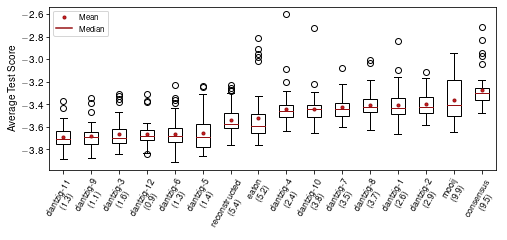

In [190]:
plt.figure(figsize=(8,3))
ax = plt.gca()
plot_scores(ax, all_scores_no_prune)
#plt.savefig("figures/sachs_scores_single.pdf", bbox_inches='tight')

### Most removed edge in dantzig-11 graph

In [32]:
index = np.where(np.array([name for name,_ in sachs.DAGs]) == 'dantzig-11')[0][0]
print("ICP-11 is in position", index)

ICP-11 is in position 14


In [33]:
# Extract the model estimated for ICP-11 in each split
removed_edges = []
_,original_graph = sachs.DAGs[index]
for i,file in enumerate(files_prune[:-1]):
    results = read_result(path + file)
    (model,I,_),_ = results[0][index]
    removed_edges.append(original_graph - model.A)


times_removed = np.sum(removed_edges, axis=0)
removed_edges = sorted([(times_removed[fro,to],fro,to) for fro,to in utils.directed_edges(times_removed)])
print("Removed edges")
for times, fro, to in removed_edges:
    print("  %s -> %s : %d times" % (sachs.node_names[fro], sachs.node_names[to], times))

Removed edges
  AKT -> ERK : 1 times
  MEK -> RAF : 4 times
  PLcg -> PIP2 : 4 times
  PKA -> AKT : 4 times
  P38 -> PKC : 4 times
  JNK -> P38 : 8 times
  PIP3 -> PIP2 : 11 times
  JNK -> PKC : 31 times


### Estimated number of latents for dantzig-11 graph

In [34]:
print("Estimated latents for ICP-11")

print("\n  with edge pruning:")
print("    %s" % n_latents_prune[:,index])
print("    mean :", n_latents_prune[:,index].mean())

print("\n  without edge pruning:")
print("    %s" % n_latents_no_prune[:,index])
print("    mean :", n_latents_no_prune[:,index].mean())

Estimated latents for ICP-11

  with edge pruning:
    [1 2 0 0 1 1 1 3 1 2 1 0 3 2 1 0 1 0 2 1 0 0 3 3 0 2 3 0 3 2 1 0 2 1 3 0 0
 1 0 2 1 2 0 3 0 0 0 2 1 0]
    mean : 1.16

  without edge pruning:
    [1 2 0 1 3 1 1 1 1 1 1 0 2 2 1 0 1 0 2 1 0 0 0 3 2 2 2 0 1 2 0 0 3 1 2 0 0
 1 0 1 0 3 0 3 1 0 1 2 2 0]
    mean : 1.08


### Score best scoring dantzig-11 model on all sachs data, returning it's information

In [35]:
# Extract the model estimated for ICP-11 in each split
all_models = []
for i,file in enumerate(files_no_prune):
    results = read_result(path + file)
    (model,I,_),_ = results[0][index]
    all_models.append((model,I))
    
# Score all models on the complete data
n_obs = [len(X) for X in sachs.all_data]
sample_covariances = [np.cov(X, rowvar=False) for X in sachs.all_data]
all_scores = []
for (model,I) in all_models:    
    score = model.score(sample_covariances, n_obs)
    all_scores.append((score, model, I))

Best score: -3.4992459998267735


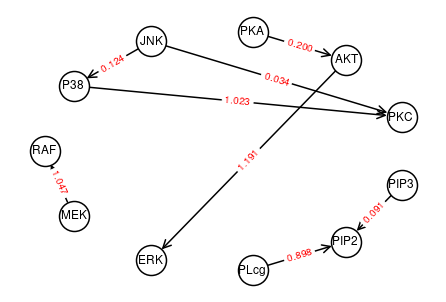

Î = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Î = ['RAF', 'MEK', 'ERK', 'PLcg', 'PIP2', 'PIP3', 'PKC', 'AKT', 'PKA', 'JNK', 'P38']
ĥ = 3

Intervention strengths (normalized variances)
   RAF : 0.12162480540014921
   MEK : 0.74706421357912
   ERK : 0.6447790789272562
   PLcg : 0.8734900284815016
   PIP2 : 0.20473143267477847
   PIP3 : 0.39137924334267077
   PKC : 0.7679721140663265
   AKT : 0.738281761387996
   PKA : 0.34432387344742194
   JNK : 0.867297735306452
   P38 : 0.8141444387860229


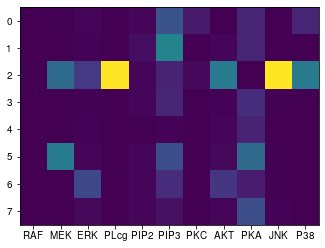

In [36]:
(best_score, best_model, best_I) = sorted(all_scores)[0]
print("Best score:", best_score)
utils.plot_graph(best_model.B, labels=sachs.node_names, weights=True)
print("Î =", best_I)
print("Î =", [sachs.node_names[i] for i in best_I])
print("ĥ =", best_model.num_latent)
plt.imshow(best_model.omegas)
plt.gca().set_xticks(range(best_model.p))
plt.gca().set_xticklabels(sachs.node_names)
#print("Intervention strengths (variances)")
#for name, var in zip(sachs.node_names,best_model.omegas.var(axis=0)):    
#    print("  ",name,":",var)
    
print("\nIntervention strengths (normalized variances)")
for name, var in zip(sachs.node_names,utils.normalized_var(best_model.omegas, axis=0)):    
    print("  ",name,":",var)

In [194]:
def plot_weights(ax, edge_estimates):
    edge_strings = [sachs.node_names[fro] + r"$\rightarrow$" + sachs.node_names[to] for fro,to in edge_estimates.keys()]
    print(edge_strings)
    ax.boxplot(list(edge_estimates.values()),
               vert=False,
               patch_artist=True,
               showmeans=True,
               medianprops = medianprops,
               meanprops = meanprops,
               boxprops = boxprops,
               flierprops=flierprops)
    ax.set_yticklabels(edge_strings)
    ax.set_xlabel("Edge weight estimate")
    ax.set_xlim(-0.1,1.6)
    ax.yaxis.tick_right()

['MEK$\\rightarrow$RAF', 'PLcg$\\rightarrow$PIP2', 'PIP3$\\rightarrow$PIP2', 'AKT$\\rightarrow$ERK', 'PKA$\\rightarrow$AKT', 'JNK$\\rightarrow$PKC', 'JNK$\\rightarrow$P38', 'P38$\\rightarrow$PKC']


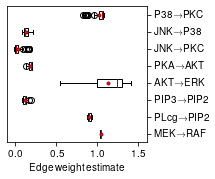

In [195]:
weights = np.array([m.B for m,_ in all_models])
edge_estimates = {}
for (fro,to) in utils.directed_edges(original_graph):
    edge_estimates[(fro,to)] = weights[:,fro,to]


plt.figure(figsize=(2.5,2.5))
ax = plt.gca()
plot_weights(ax, edge_estimates)

## Figure 5

['MEK$\\rightarrow$RAF', 'PLcg$\\rightarrow$PIP2', 'PIP3$\\rightarrow$PIP2', 'AKT$\\rightarrow$ERK', 'PKA$\\rightarrow$AKT', 'JNK$\\rightarrow$PKC', 'JNK$\\rightarrow$P38', 'P38$\\rightarrow$PKC']


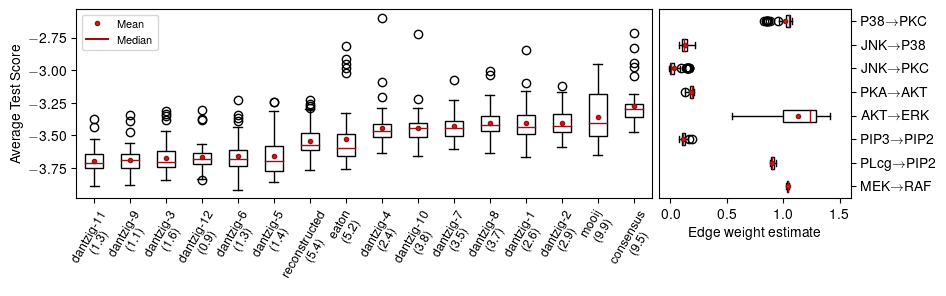

In [196]:
w = 2.5
plt.figure(figsize=(4*w,w), dpi=100)
gs = gridspec.GridSpec(1, 2, width_ratios=[3/4, 1/4], wspace=0.02, hspace=0.00)

# Scores plot
plt.subplot(gs[0])
ax = plt.gca()
plot_scores(ax, all_scores_no_prune)

# Scores plot
plt.subplot(gs[1])
ax = plt.gca()
plot_weights(ax, edge_estimates)

filename = "figure_sachs.pdf"
if filename is not None:
    plt.savefig("figures/%s" % filename, bbox_inches='tight')

## Figure 10: Highest scoring graphs

dantzig-3


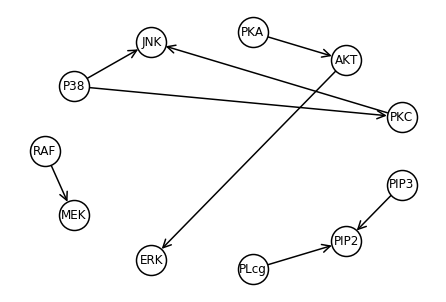

dantzig-9


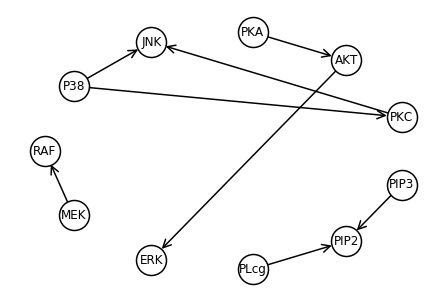

dantzig-11


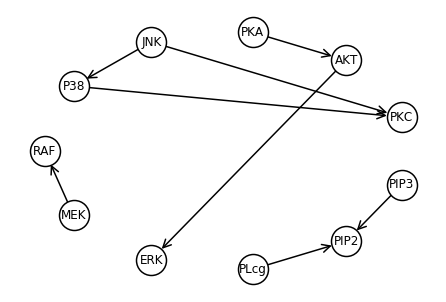

In [3]:
for name,A in sachs.DAGs:
    if name in ['dantzig-11', 'dantzig-3', 'dantzig-9']:
        print(name)
        utils.plot_graph(A, labels=sachs.node_names, weights=False)